<a href="https://colab.research.google.com/github/rukuboy1997/nlp-practice/blob/main/nlp_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

### Word Cloud
### Counting Word Frequencies
### Removing Stopwords
### Tokenization

earth is the third planet from the sun and the only astronomical object known to harbor life. this is enabled by earth being a water world, the only one in the solar system sustaining liquid surface w...
 
earth's:  	115 
earth:  	69 
surface:  	46 
about:  	43 
it:  	42 
solar:  	40 
on:  	40 
has:  	38 
water:  	36 
million:  	36 
which:  	35 
have:  	35 
into:  	32 
or:  	31 
most:  	28 
crust:  	27 
life:  	27 
land:  	26 
sun:  	25 
other:  	25 
 
[("earth's", 115), ('earth', 69), ('surface', 46), ('about', 43), ('it', 42), ('solar', 40), ('on', 40), ('has', 38), ('water', 36), ('million', 36), ('which', 35), ('have', 35), ('into', 32), ('or', 31), ('most', 28), ('crust', 27), ('life', 27), ('land', 26), ('sun', 25), ('other', 25)]
 


(-0.5, 599.5, 299.5, -0.5)

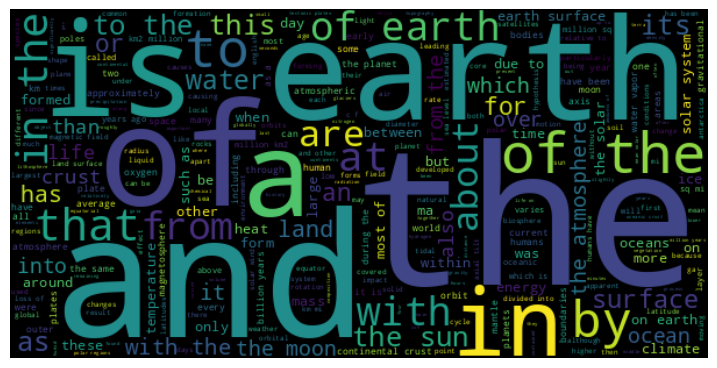

In [ ]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''

  params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': title, # title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
  }

  # send a request to the wikipedia api
  response = requests.get(
      'https://en.wikipedia.org/w/api.php',
      params= params
  ).json()

  # Parse the result
  page = next(iter(response['query']['pages'].values()))


  # return the page content
  if 'extract' in page.keys():
      return page['extract']
  else:
      return "Page not found"

# first get the text from the wikipedia page with

text = wikipedia_page('Earth').lower()

print(text[:200] + "...")
print(' ')

from collections import Counter

# we transform the text into a list of words
# by splitting over the space character ' '
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]

# and count the words
word_counts = Counter(words_without_stopwords)

for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]} ")

print(' ')

print(Counter(words_without_stopwords).most_common(20))

print(' ')

from wordcloud import WordCloud

# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
    random_state = 8,
    normalize_plurals = False,
    width = 600,
    height= 300,
    max_words = 300,
    stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(text)


# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [ ]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''

  params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': title, # title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
  }

  # send a request to the wikipedia api
  response = requests.get(
      'https://en.wikipedia.org/w/api.php',
      params= params
  ).json()

  # Parse the result
  page = next(iter(response['query']['pages'].values()))


  # return the page content
  if 'extract' in page.keys():
      return page['extract']
  else:
      return "Page not found"



print(' ')

from nltk.tokenize import WordPunctTokenizer

# Get the text from the Earth wikipedia page
text = wikipedia_page('Earth')

# tokenize
tokens = WordPunctTokenizer().tokenize(text)

# print the 20 most commons tokens
print(Counter(tokens).most_common(20))

print(' ')

 
[('the', 646), (',', 589), ('.', 492), ('of', 362), ('and', 288), ('Earth', 258), ('is', 175), ('to', 166), ('s', 161), ("'", 160), ('in', 142), ('a', 140), ('(', 109), ('The', 97), ('-', 79), ('with', 76), ('by', 72), ('from', 67), ('as', 67), ('surface', 62)]
 


## Practical

* Find a Wikipedia page, a text from Project Gutenberg, or any other NLP dataset.
* Tokenize the text using NLTK  WordPunctTokenizer.
* Explore the list of tokens and their frequency.
* Experiment with the  WordCloud()  parameters to generate different word clouds from the original text:
 * collocations = False
 * normalize_plurals = True or False
 * include_numbers = True or False
 * min_word_length
 * stopwords
* Remove stopwords from the original text.
* Use  string.punctuation  and  string.digits  to remove punctuation and numbers.

 
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '==']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

[('names', 29), ('name', 15), ('given', 12), ('English', 9), ('surname', 8), ('England', 7), ('),', 7), ('surnames', 7), ('used', 6), ('named', 5), ('first', 4), ('The', 4), ('often', 4), ('comes', 4), ('feminine', 4), ('A', 4), ('s', 4), ('boys', 4), ('example', 4), ('===', 4)]



(-0.5, 399.5, 199.5, -0.5)

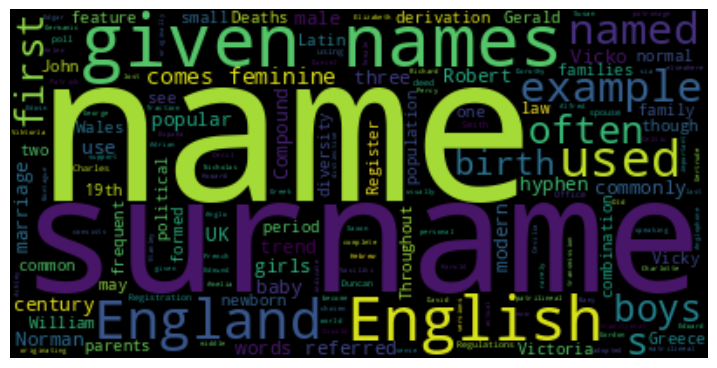

In [ ]:
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''

  params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': title, # title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
  }

  # send a request to the wikipedia api
  response = requests.get(
      'https://en.wikipedia.org/w/api.php',
      params= params
  ).json()

  # Parse the result
  page = next(iter(response['query']['pages'].values()))


  # return the page content
  if 'extract' in page.keys():
      return page['extract']
  else:
      return "Page not found"

print(' ')

from nltk.tokenize import WordPunctTokenizer

# Get the text from the Earth wikipedia page
text = wikipedia_page('English name')

# tokenize
tokens = WordPunctTokenizer().tokenize(text)


# remove stopwords

stopwords = list(WordCloud().stopwords)
punctuations = list(string.punctuation)
digits = list(string.digits)
equalsign = "=="

punctuations.append(equalsign)

print(punctuations)
print(digits)

print("")

words = [ word for word in tokens if word not in stopwords]

words_without = [ word for word in words if word not in punctuations]

words_without_stopwords = [ word for word in words_without if word not in digits]

# print the 20 most commons tokens
print(Counter(words_without_stopwords).most_common(20))

new_text = ' '.join(words_without_stopwords)

# Instantiate / create a new wordcloud.
wordcloud = WordCloud()

# Apply the wordcloud to the text.
wordcloud.generate(new_text)

print('')

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

## Stemming Or Lemmatization

In [ ]:
# Import tokenizer, stemmer and stopwords
import requests
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import numpy as np

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''

  params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': title, # title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
  }

  # send a request to the wikipedia api
  response = requests.get(
      'https://en.wikipedia.org/w/api.php',
      params= params
  ).json()

  # Parse the result
  page = next(iter(response['query']['pages'].values()))


  # return the page content
  if 'extract' in page.keys():
      return page['extract']
  else:
      return "Page not found"


# Get the text from the Wikipedia Earth page
# (see chap 1 for the wikipedia_page() function)
text = wikipedia_page('Earth').lower()

# Tokenize as usual
tokens = WordPunctTokenizer().tokenize(text)

# Filter out stopwords
tokens = [tk for tk in tokens if tk not in stopwords.words('english')]

# Now, instantiate a stemmer
ps = PorterStemmer()

# and stem the tokens
stems   = [ps.stem(tk) for tk in tokens ]

np.random.choice(stems, size = 10)

array(['particularli', ',', ',', 'colon', 'region', 'magnetospher',
       'continent', 'o3', 'interconnected', 'lunar'], dtype='<U15')